# Systematic Literature Review: Extraction of Design models from Software Requeriments Specification

## Import the libraries

In [871]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from matplotlib import style 
#plt.style.use('ggplot') 
plt.style.use('seaborn-v0_8') 

## Main column constants definition

In [872]:
PUBLICATION_YEAR = 'Publication Year'
SYNONYMUS = 'Synonymus / Alike Terms'
TERM = 'Term'
PICOC = 'PICOC'
TITLE = 'Title'
CITED_BY = 'Cited by'
ITEM_TYPE = 'Item Type'

## Function for joining synonymus and alike termns

In [873]:
def join_synonymus(string):
    list_string = string.split(',')
    
    for idx, x in enumerate(list_string):
        list_string[idx] = '"'+x.upper().strip()+'"'
    return ' OR '.join(list_string)

## Import PICOC Criteria dataset

In [874]:
dataset = pd.read_csv('data/Systematic Literature Review (SLR) - PICOC Criteria.csv')

## Create queries grouped by PICOC terms with synonyms and alike terms

In [875]:
picoc_query_by_terms = {}

for index, row in dataset.iterrows():
    if row[TERM] in picoc_query_by_terms:
        picoc_query_by_terms[row[TERM]] = picoc_query_by_terms[row[TERM]] + ' OR "'+row[PICOC].upper().strip()+'"' + ' OR ' + join_synonymus(row[SYNONYMUS])
    else:
       picoc_query_by_terms[row[TERM]] = '"'+row[PICOC].upper().strip()+'"' + ' OR ' + join_synonymus(row[SYNONYMUS])
print(picoc_query_by_terms)

{'Population': '"SOFTWARE DEVELOPMENT INDUSTRY" OR "SOFTWARE INDUSTRY" OR "IT PROJECT" OR "SOFTWARE PRACTITIONER" OR "TEAM MEMBERS" OR "PROGRAMMER" OR "SOFTWARE ARCHITECT" OR "SOFTWARE ANALYST" OR "TESTER" OR "SOFTWARE DEVELOPMENT LIFECYCLE" OR "SOFTWARE DEVELOPMENT PROCESS" OR "SOFTWARE PROCESS" OR "SOFTWARE LIFECYCLE" OR "AGILE METHOLODOGIES"', 'Intervention': '"SOFTWARE REQUIREMENTS SPECIFICATION" OR "SRS" OR "USER HISTORIES" OR "USE CASE" OR "EPIC" OR "FUNCTIONAL REQUIREMENTS" OR "NOT FUNCTIONAL REQUIREMENTS" OR "SYSTEM REQUIREMENTS" OR "SOFTWARE DESIGN" OR "SOFTWARE ARCHITECTURE" OR "SYSTEM ARCHITECTURE" OR "UML" OR "DESIGN PATTERNS" OR "UNIFIED MODELING LANGUAGE" OR "UML"', 'Comparison': '"CODE INTELLIGENCE" OR "LOWCODE" OR "LOW-CODE" OR "ARTIFICIAL INTELLIGENCE" OR "AI" OR "NATURAL LANGUAJE PROCESSING TECHNIQUES" OR "NATURAL LANGUAJE PROCESSING" OR "NLP" OR "GENERATIVE AI" OR "GENAI" OR "MACHINE LEARNING" OR "ML" OR "DEEP LEARNING" OR "DL" OR "LARGE LANGUAGE MODELS" OR "LLM" OR 

## Create base query

In [876]:
base_query_array = []
for key in picoc_query_by_terms:
    base_query_array.append('('+picoc_query_by_terms[key]+')')
 
base_query = ' AND '.join(base_query_array);   
print(base_query)

("SOFTWARE DEVELOPMENT INDUSTRY" OR "SOFTWARE INDUSTRY" OR "IT PROJECT" OR "SOFTWARE PRACTITIONER" OR "TEAM MEMBERS" OR "PROGRAMMER" OR "SOFTWARE ARCHITECT" OR "SOFTWARE ANALYST" OR "TESTER" OR "SOFTWARE DEVELOPMENT LIFECYCLE" OR "SOFTWARE DEVELOPMENT PROCESS" OR "SOFTWARE PROCESS" OR "SOFTWARE LIFECYCLE" OR "AGILE METHOLODOGIES") AND ("SOFTWARE REQUIREMENTS SPECIFICATION" OR "SRS" OR "USER HISTORIES" OR "USE CASE" OR "EPIC" OR "FUNCTIONAL REQUIREMENTS" OR "NOT FUNCTIONAL REQUIREMENTS" OR "SYSTEM REQUIREMENTS" OR "SOFTWARE DESIGN" OR "SOFTWARE ARCHITECTURE" OR "SYSTEM ARCHITECTURE" OR "UML" OR "DESIGN PATTERNS" OR "UNIFIED MODELING LANGUAGE" OR "UML") AND ("CODE INTELLIGENCE" OR "LOWCODE" OR "LOW-CODE" OR "ARTIFICIAL INTELLIGENCE" OR "AI" OR "NATURAL LANGUAJE PROCESSING TECHNIQUES" OR "NATURAL LANGUAJE PROCESSING" OR "NLP" OR "GENERATIVE AI" OR "GENAI" OR "MACHINE LEARNING" OR "ML" OR "DEEP LEARNING" OR "DL" OR "LARGE LANGUAGE MODELS" OR "LLM" OR "GPT" OR "PALM" OR "BERT" OR "CLAUDE" O

## Save the base query string into a file

In [877]:
with open("queries/base_query.sql", "w") as text_file:
    print("{}".format(base_query), file=text_file)

## Save the scopus query string into a file

In [878]:
with open("queries/scopus_query.sql", "w") as text_file:
    print("TITLE-ABS-KEY({}) AND (LIMIT-TO(PUBYEAR,2016) OR LIMIT-TO(PUBYEAR,2017) OR LIMIT-TO(PUBYEAR,2018) OR LIMIT-TO(PUBYEAR,2019) OR LIMIT-TO(PUBYEAR,2020))".format(base_query), file=text_file)

## Articles analysis

,Publication Year,Title,Item Type,Cited by
24,2021,CodeXGLUE: A Machine Learning Benchmark Datase...,preprint,769
23,2015,UML @ Classroom: An Introduction to Object-Ori...,book,226
1,2017,PURE: A Dataset of Public Requirements Documents,conferencePaper,181
20,2011,Semi-automatic generation of UML models from n...,conferencePaper,154
4,2009,An Automated Tool for Generating UML Models fr...,conferencePaper,152
18,2018,Automatic Transformation of User Stories into ...,journalArticle,138
16,1996,Processing natural language software requireme...,conferencePaper,118
19,2009,Object Oriented Software Modeling Using NLP Ba...,journalArticle,85
25,2017,Natural Language Requirements Processing: A 4D...,journalArticle,75
5,2018,Artificial Intelligence Techniques in Software...,conferencePaper,41


<Axes: ylabel='Title'>

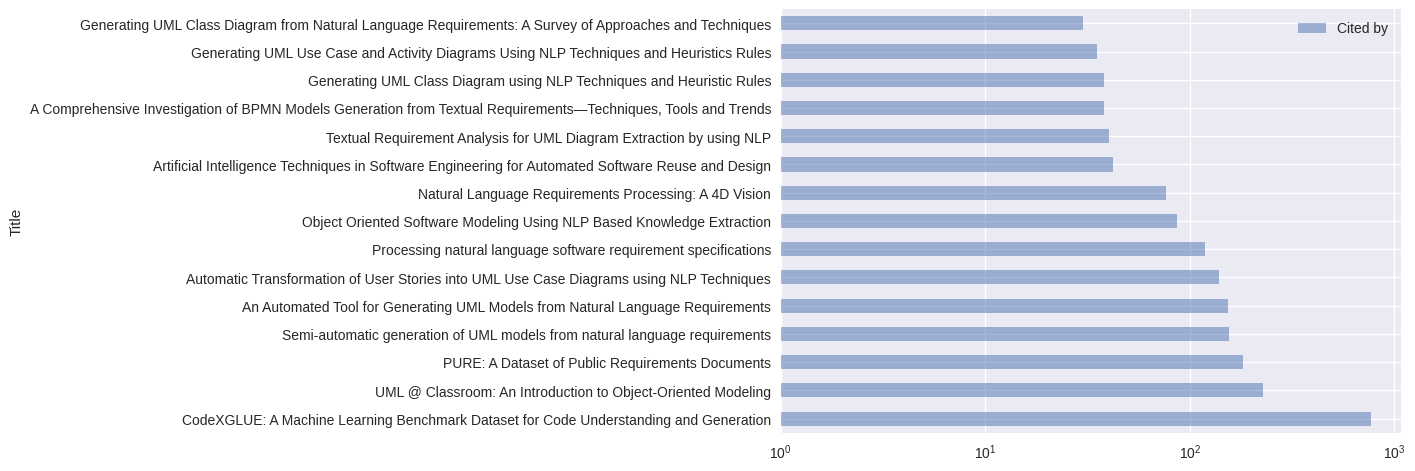

In [879]:
articles = pd.read_csv('data/articles_with_cites.csv')
articles_top = articles.sort_values(CITED_BY, ascending=False).head(15)[[PUBLICATION_YEAR,TITLE,ITEM_TYPE,CITED_BY]]
display(articles_top)
articles_top.plot.barh(x=TITLE, y=CITED_BY, alpha=0.5,log=True)

## Articles by Publication Year

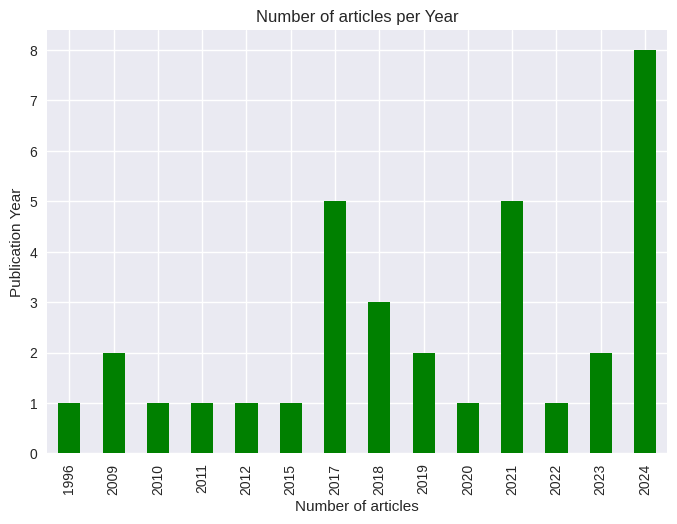

In [880]:
publication_year = articles[PUBLICATION_YEAR].value_counts().sort_index().plot.bar(color='green')
plt.xlabel('Number of articles')
plt.ylabel('Publication Year')
plt.title('Number of articles per Year')
plt.show()

## Articles by Item Type

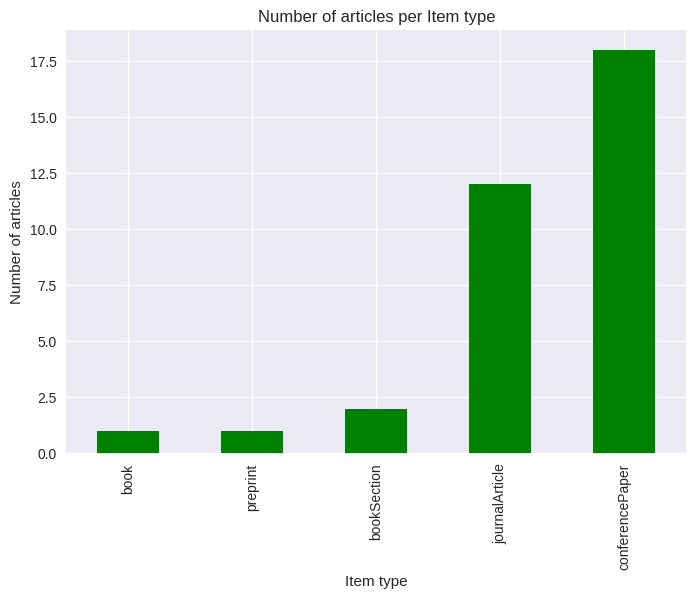

In [881]:
articles['Item Type'].value_counts().sort_values().plot.bar(color='green')
plt.xlabel('Item type')
plt.ylabel('Number of articles')
plt.title('Number of articles per Item type')
plt.show()

## Articles by Place

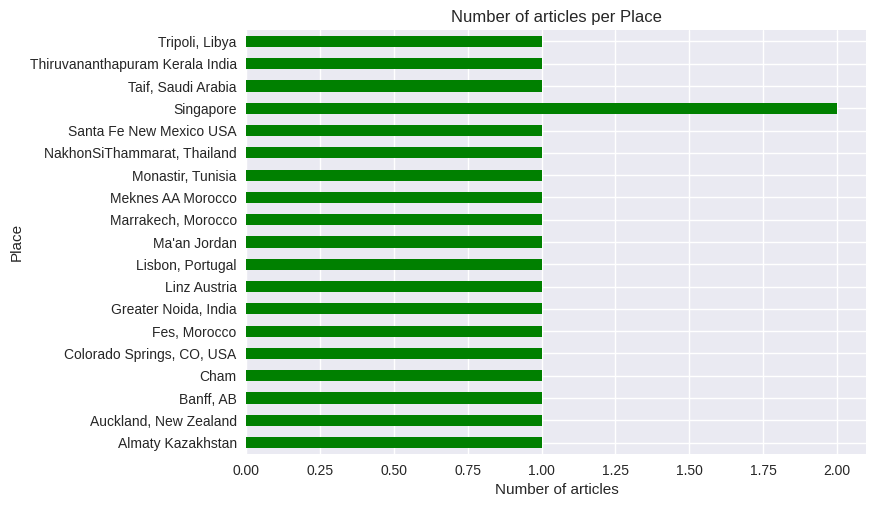

In [882]:
place = articles['Place'].value_counts().sort_index().plot.barh(color='green')
plt.xlabel('Number of articles')
plt.ylabel('Place')
plt.title('Number of articles per Place')
plt.show()

## Article Assessment

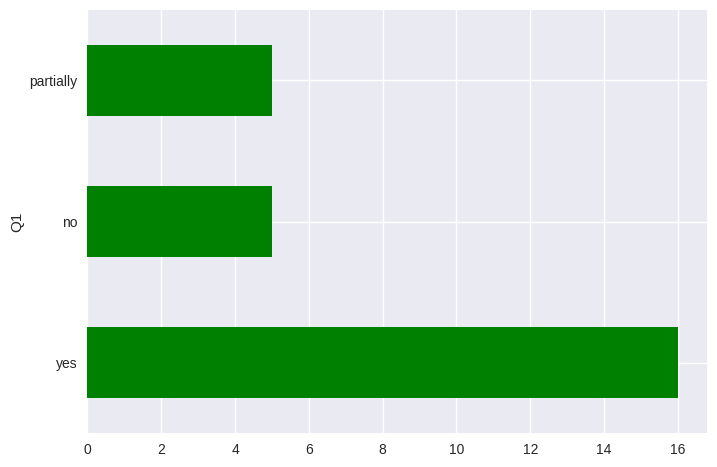

In [883]:
articles_assessment = pd.read_csv('data/Systematic Literature Review (SLR) - Assessment.csv')

q1 = articles_assessment['Q1'].value_counts().plot.barh(color='green')


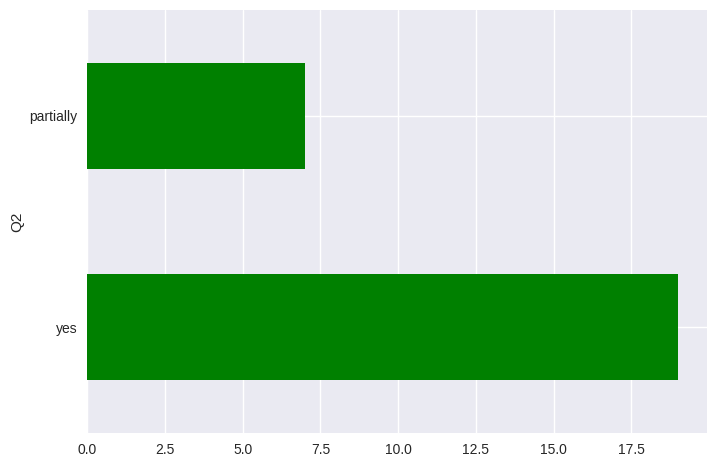

In [884]:
q2 = articles_assessment['Q2'].value_counts().plot.barh(color='green')

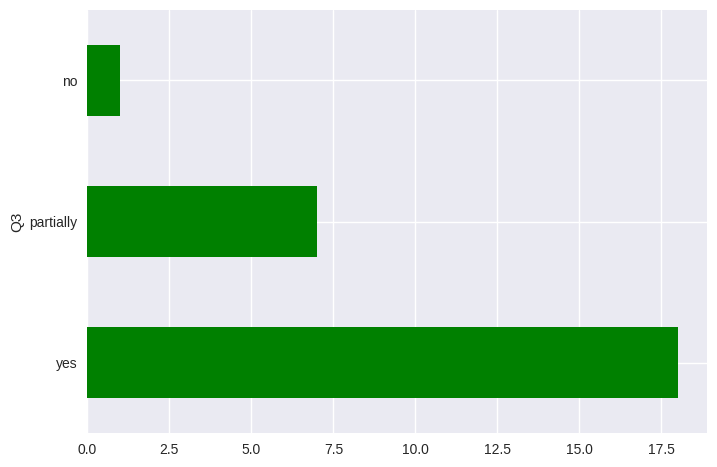

In [885]:
q3 = articles_assessment['Q3'].value_counts().plot.barh(color='green')

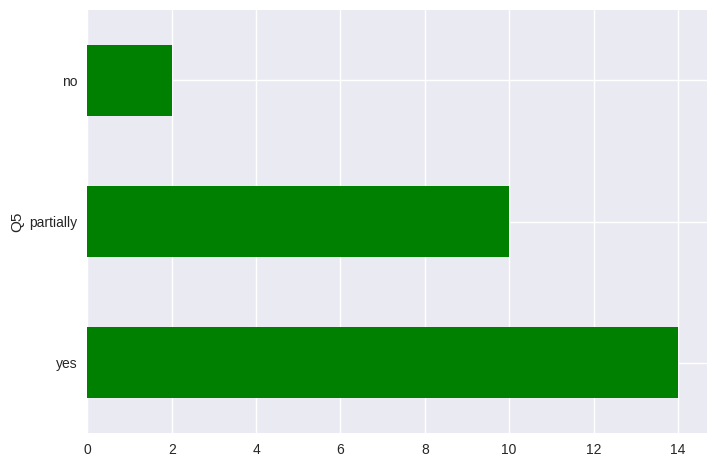

In [886]:
q5 = articles_assessment['Q5'].value_counts().plot.barh(color='green')

In [887]:
articles_assessment_sorted = articles_assessment.sort_values(by=['Total score'], ascending=False)
display(articles_assessment_sorted)

,Title,Q1,Q2,Q3,Q4,Q5,Total score
0,A Comparison of Transforming the User Stories ...,yes,yes,yes,yes,yes,5.0
3,An Algorithmic Approach for Generating Behavio...,yes,yes,yes,yes,yes,5.0
11,Generating UML Class Diagram from Natural Lang...,yes,yes,yes,yes,yes,5.0
9,Extracting UML class diagrams from software re...,yes,yes,yes,yes,yes,5.0
8,Automatic Transformation of Natural to Unified...,yes,yes,yes,yes,yes,5.0
7,Automated Derivation of UML Sequence Diagrams ...,yes,yes,yes,yes,yes,5.0
10,From Requirements Engineering to UML using Nat...,yes,yes,yes,yes,yes,5.0
14,Leveraging NLP Techniques for Privacy Requirem...,partially,yes,yes,yes,yes,4.5
1,PURE: A Dataset of Public Requirements Documents,no,yes,yes,yes,yes,4.0
6,A Systematic Literature Review on Using Natura...,partially,partially,yes,yes,yes,4.0


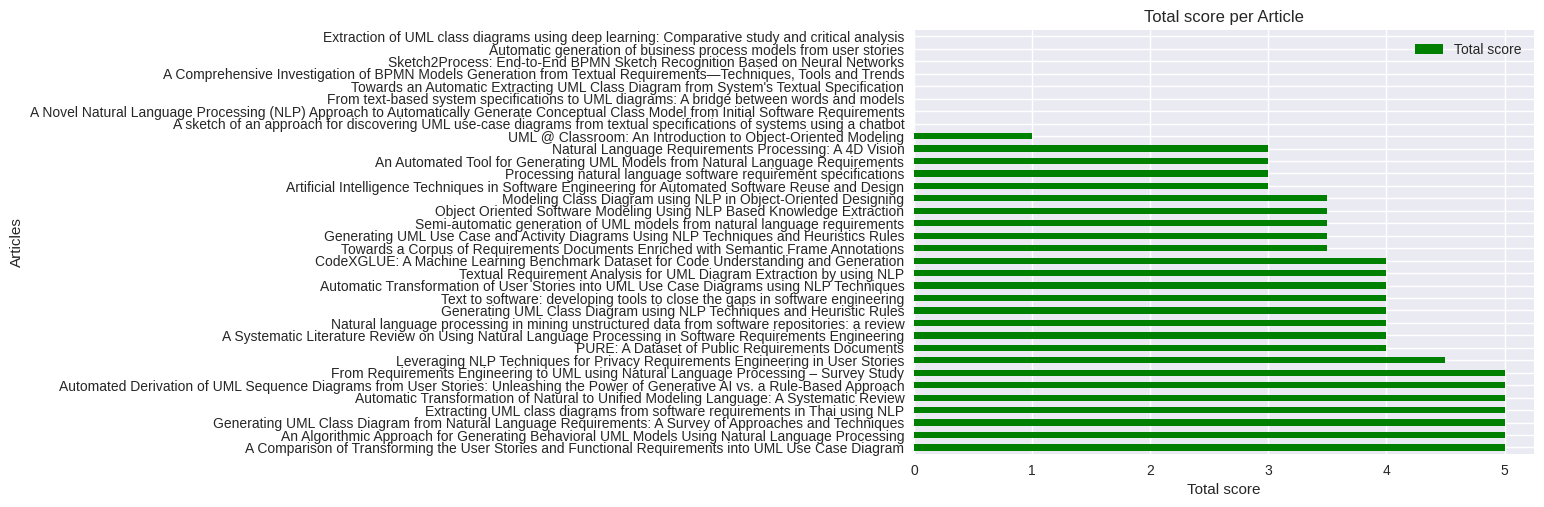

In [888]:
articles_assessment_sorted = articles_assessment_sorted[[TITLE,'Total score']]
articles_assessment_sorted.plot.barh(color='green', x='Title', y='Total score')

plt.xlabel('Total score')
plt.ylabel('Articles')
plt.title('Total score per Article')
plt.show()